In [2]:
try:       importlib.reload(Jupytils)
except:    import Jupytils
from Jupytils.Charts import *;
showTopbar("Markov Chain Asthma Prediction")

<IPython.core.display.Javascript object>

In [50]:
patient="hand2"
hand2="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20calculated_jlee%20WHERE%20pname=%27"+patient+"%27%20ORDER%20BY%20date,%20time"
fileName = hand2;

# => Load Data
proxies=None
df = LoadDataSet(fileName, checkForDateTime=False, proxies=proxies);
assert 'pef1' not in df.columns, "This must be old Data"
    
sdttm = df.date + " " + df.time 

if ('sdttm' not in df.columns):
    df.insert(0, 'sdttm', sdttm)
df.sdttm = pd.to_datetime(df.sdttm)

#s= pd.qcut(df1.pefmax, 10, labels='a1,a2,a3,a4,a5,a6,a7,a8,a9,a10'.split(','))
nq = 10
lnq=list(range(0,nq))
#s= pd.qcut(df1.pefmax, nq, labels='0,1,2,3,4,5,6,7,8,9'.split(','))
s= pd.qcut(df.pef, nq, labels=lnq )
df.insert(1,"pefcat", s)
#df.pefcat = df.pefcat.astype(str)
df.pefcat = df.pefcat.astype(int)
df.insert(1,"pefcat1", 0)

df.loc[ (df.pefcat == 0) | (df.pefcat == 1) | (df.pefcat ==2), 'pefcat1'] = 1
df.loc[ (df.pefcat == 3) | (df.pefcat == 4) | (df.pefcat ==5) | (df.pefcat==6), 'pefcat1'] = 2
df.loc[ (df.pefcat == 7) | (df.pefcat == 8) | (df.pefcat ==9) , 'pefcat1' ] = 3


df.sort_values(by='sdttm', ascending=True, inplace=True)
drps  = "cname, time, date, timeofday, dateofmeasure, npt, pef1, pef2, pef3, indexpef".split(', ')
df=df.drop(drps, axis=1, errors='ignore')
df=df.reset_index(drop=True)


df.pef_zone = df.pefcat1

#for c in df.columns:
#    if (c.find('avg') >0):
#        print (c)
dff1=df['sdttm ampm pef_zone so2_avg co_avg o3_avg no2_avg pm10_avg temperaturec windspeedms precipitationpercent vaporpressurehpa  airpressurehpa'.split()]
for i,u in enumerate(dff1.pef_zone.unique()):
    dff1.pef_zone[dff1.pef_zone == u]= i+1
dff1.pef_zone = dff1.pef_zone.astype(int)
df1=dff1
dfAM = df1[df1.ampm == 'am'].copy();
allDays = pd.date_range(dfAM.sdttm.min(), dfAM.sdttm.max(), freq='D')
dfAM.index=dfAM.sdttm;
dfAM=dfAM.reindex(allDays, method='ffill') #fill_value=0) #'bfill')
#dfAM


df

,sdttm,pefcat1,pefcat,pname,ampm,pef,pef_zone,tm_window,so2_max,co_max,o3_max,no2_max,pm10_max,so2_sum,co_sum,o3_sum,no2_sum,pm10_sum,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,winddirection,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperature_max,airpressure_max,precipitation_max,temperature_min,airpressure_min,precipitation_min,temperature_diff,airpressure_diff,precipitation_diff
0,2015-01-02 06:24:00,2,6,hand2,am,279,2,22.700,0.004,0.700,0.025,0.024,145.000,0.078,12.790,0.428,0.300,990.300,0.003,0.563,0.019,0.013,43.626,-6.800,1.200,340.000,58.000,2.100,-13.600,1020.500,1025.000,-4.800,-3.900,1022.200,63.000,-8.500,1019.600,35.000,4.600,2.600,28.000
1,2015-01-02 17:30:00,2,4,hand2,pm,263,2,23.067,0.006,0.900,0.026,0.035,54.000,0.088,13.590,0.388,0.404,647.867,0.004,0.589,0.017,0.018,28.087,-2.500,2.500,290.000,33.000,1.700,-16.600,1021.700,1026.100,-3.000,-0.800,1022.200,68.000,-8.300,1019.900,31.000,7.500,2.300,37.000
2,2015-01-03 07:19:00,1,2,hand2,am,251,1,24.917,0.009,0.900,0.026,0.035,54.000,0.125,17.045,0.299,0.584,886.283,0.005,0.684,0.012,0.023,35.570,-9.600,0.600,180.000,71.000,2.100,-13.800,1022.700,1027.200,-6.900,-0.800,1023.400,71.000,-9.600,1019.900,31.000,8.800,3.500,40.000
3,2015-01-03 18:15:00,2,4,hand2,pm,265,2,24.750,0.013,1.000,0.018,0.039,54.000,0.172,19.000,0.222,0.718,949.250,0.007,0.768,0.009,0.029,38.354,1.200,1.500,160.000,60.000,4.000,-5.700,1017.100,1021.400,-1.000,1.900,1023.400,71.000,-9.600,1017.100,33.000,11.500,6.300,38.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,2016-10-17 18:21:00,2,3,hand2,pm,260,2,23.217,0.004,0.700,0.055,0.037,72.000,0.059,13.430,0.359,0.652,1233.783,0.003,0.578,0.015,0.028,53.142,18.200,2.500,270.000,80.000,16.600,14.600,1013.800,1017.800,17.600,22.400,1014.600,100.000,14.700,1012.600,55.000,7.700,2.000,45.000
1310,2016-10-18 06:00:00,3,7,hand2,am,286,3,22.817,0.004,0.900,0.055,0.039,72.000,0.066,12.690,0.453,0.625,1205.467,0.003,0.556,0.020,0.027,52.833,11.900,0.600,250.000,100.000,13.800,11.800,1016.100,1020.200,12.900,22.400,1016.200,100.000,11.900,1013.000,55.000,10.500,3.200,45.000
1311,2016-10-18 18:01:00,2,6,hand2,pm,281,2,23.667,0.006,0.900,0.032,0.064,86.000,0.086,13.802,0.315,0.725,1337.400,0.004,0.583,0.013,0.031,56.510,17.000,0.000,0.000,83.000,16.000,14.000,1015.000,1019.000,16.000,20.800,1018.100,100.000,11.000,1013.800,61.000,9.800,4.300,39.000
1312,2016-10-19 06:28:00,3,9,hand2,am,311,3,24.467,0.007,1.000,0.032,0.064,104.000,0.118,18.420,0.199,1.045,1752.667,0.005,0.753,0.008,0.043,71.635,11.700,0.000,0.000,100.000,13.700,11.600,1014.900,1019.000,11.900,20.800,1018.100,100.000,11.000,1014.900,61.000,9.800,3.200,39.000


In [204]:
han1="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20patient_data_table";
hand="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20hand"
kimj="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20kimj";
leeh="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20leeh";
sony="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20sony";
kuky="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20kuky";
hand="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20hand"
#patient="leeh2"
patient="hand2"
hand2="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20calculated_jlee%20WHERE%20pname=%27"+patient+"%27%20ORDER%20BY%20date,%20time"
fileName = hand2;

# => Load Data
proxies=None
df = LoadDataSet(fileName, checkForDateTime=False, proxies=proxies);
assert 'pef1' not in df.columns, "This must be old Data"
    
sdttm = df.date + " " + df.time 

if ('sdttm' not in df.columns):
    df.insert(0, 'sdttm', sdttm)
df.sdttm = pd.to_datetime(df.sdttm)

#s= pd.qcut(df1.pefmax, 10, labels='a1,a2,a3,a4,a5,a6,a7,a8,a9,a10'.split(','))
nq = 10
lnq=list(range(0,nq))
#s= pd.qcut(df1.pefmax, nq, labels='0,1,2,3,4,5,6,7,8,9'.split(','))
s= pd.qcut(df.pef, nq, labels=lnq )
df.insert(1,"pefcat", s)
#df.pefcat = df.pefcat.astype(str)
df.pefcat = df.pefcat.astype(int)
df.insert(1,"pefcat1", 0)

df.loc[ (df.pefcat == 0) | (df.pefcat == 1) | (df.pefcat ==2), 'pefcat1'] = 1
df.loc[ (df.pefcat == 3) | (df.pefcat == 4) | (df.pefcat ==5) | (df.pefcat==6), 'pefcat1'] = 2
df.loc[ (df.pefcat == 7) | (df.pefcat == 8) | (df.pefcat ==9) , 'pefcat1' ] = 3


df.sort_values(by='sdttm', ascending=True, inplace=True)
drps  = "cname, time, date, timeofday, dateofmeasure, npt, pef1, pef2, pef3, indexpef".split(', ')
df=df.drop(drps, axis=1, errors='ignore')
df=df.reset_index(drop=True)


df.pef_zone = df.pefcat1.astype(str)
#for c in df.columns:
#    if (c.find('avg') >0):
#        print (c)
dff1=df['sdttm ampm pef_zone so2_avg co_avg o3_avg no2_avg pm10_avg temperaturec windspeedms precipitationpercent vaporpressurehpa  airpressurehpa'.split()]
for i,u in enumerate(dff1.pef_zone.unique()):
    dff1.pef_zone[dff1.pef_zone == u]= i+1
dff1.pef_zone = dff1.pef_zone.astype(int)
df1=dff1
dfAM = df1[df1.ampm == 'am'].copy();
allDays = pd.date_range(dfAM.sdttm.min(), dfAM.sdttm.max(), freq='D')
dfAM.index=dfAM.sdttm;
dfAM=dfAM.reindex(allDays, method='ffill') #fill_value=0) #'bfill')
#dfAM


dfPM = df1[df1.ampm == 'pm'].copy();
allDays = pd.date_range(dfPM.sdttm.min(), dfPM.sdttm.max(), freq='D')
dfPM.index=dfPM.sdttm;
dfPM=dfPM.reindex(allDays, method='ffill') #fill_value=0) #'bfill')

dfAMp= dfAM.copy()
#for c in dfAMp.columns:
#    if (dfAMp[c].dtype == number):
#        scaler = StandardScaler()
#        dfAMp[c] = scaler.fit_transform(dfAMp[c])
#dfAMp   
#dfAM

dfAMq= dfAM.copy()
#for c in dfAMq.columns:
#    if (dfAMq[c].dtype == number):
#        nq = len(dfAM.pef_zone.unique())
#        lnq=list(range(1,nq+1))
##        s= pd.qcut(dfAMq[c], nq, labels=lnq )
        
#        dfAMq[c] = s.astype(int)
#dfAMq
dfAMp


,sdttm,ampm,pef_zone,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,precipitationpercent,vaporpressurehpa,airpressurehpa
2015-01-02 06:24:00,2015-01-02 06:24:00,am,1,0.003,0.563,0.019,0.013,43.626,-6.800,1.200,58.000,2.100,1020.500
2015-01-03 06:24:00,2015-01-02 06:24:00,am,1,0.003,0.563,0.019,0.013,43.626,-6.800,1.200,58.000,2.100,1020.500
2015-01-04 06:24:00,2015-01-03 07:19:00,am,2,0.005,0.684,0.012,0.023,35.570,-9.600,0.600,71.000,2.100,1022.700
2015-01-05 06:24:00,2015-01-05 06:08:00,am,1,0.006,0.997,0.005,0.048,55.841,-2.800,0.000,100.000,5.000,1016.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-16 06:24:00,2016-10-15 06:00:00,am,3,0.005,0.787,0.011,0.045,79.103,11.400,0.100,100.000,13.400,1022.600
2016-10-17 06:24:00,2016-10-17 06:11:00,am,3,0.003,0.587,0.012,0.028,55.090,15.000,0.800,97.000,16.500,1013.400
2016-10-18 06:24:00,2016-10-18 06:00:00,am,3,0.003,0.556,0.020,0.027,52.833,11.900,0.600,100.000,13.800,1016.100
2016-10-19 06:24:00,2016-10-18 06:00:00,am,3,0.003,0.556,0.020,0.027,52.833,11.900,0.600,100.000,13.800,1016.100


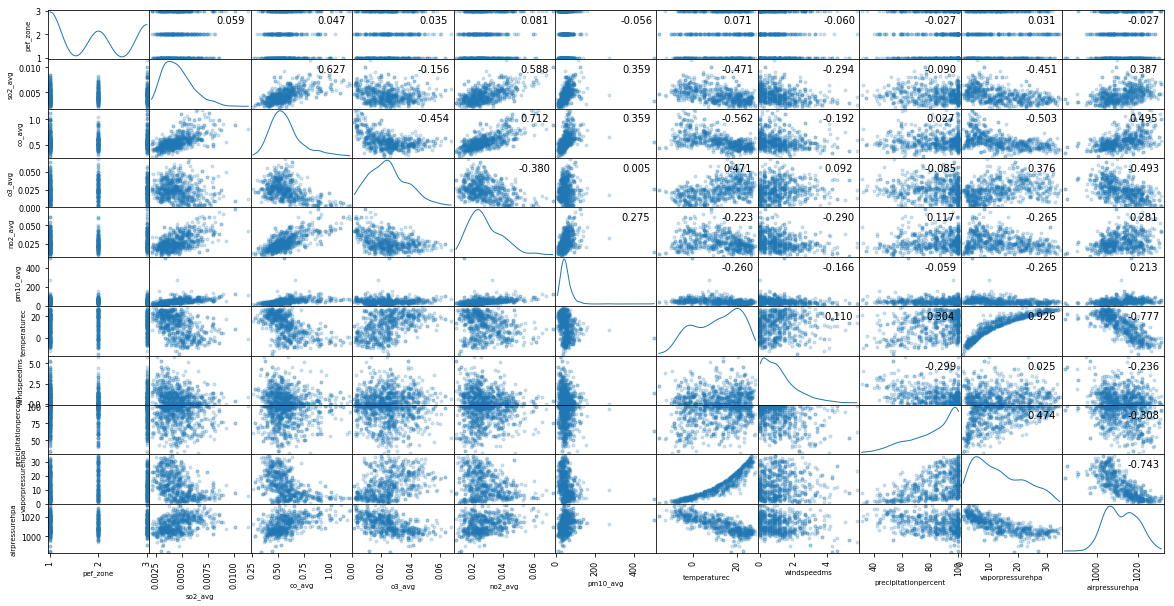

In [205]:
axes=scatter_matrix(dfAMq, alpha=0.2, diagonal='kde', figsize=(20, 10)); # diagonal can be 'hist';
corr = dfAMq.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')


In [206]:
def PlotHCts1(df, x, cols=[], div=None, title='', subtitle='', yTitle='',xTitle='', num=1000000,
          onClick='function(){g=this;console.log(g.index, g.y, g.x)}',
            animation='true', ctype=None):
    TS='''
<script>
Highcharts.chart('CHART_DIV', {
    chart: { type: 'line' ,  zoomType: 'x' },
    title: { text: 'CHART_TITLE' , zoomType:'xy' },
    subtitle: { text: 'CHART_SUB_TITLE' },
    xAxis: {type: 'datetime'
    },
    yAxis: {
        title: { text: 'CHART_Y_AXIS_TITLE'}
    },
    plotOptions: {
        scatter: {
            marker: { radius: 3},
            states: {
                hover: {
                    enabled: true,
                    lineColor: 'rgb(100,100,100)'
                }
            }
        },
        line: {
            animation: CHART_ANIMATION,
            dataLabels: {  enabled: false  },
            enableMouseTracking: true,
            lineWidth: 0.1,
            marker: { radius: 3} 
            },
            
            series: {
                point: {
                    events: {
                        click: CLICK_FUNCTION
                    }
                }
            }
        },
        DATA

});
</script>
'''
    
    ts ="";
    if ( div is None ):
        div = 'chart_' + str(np.random.randint(1000000))
        ts = '<div id="{}" style="height:200px"></div>\n'.format(div)
        
    if (type(x) == str):
        xa = df[x]
    elif (type(x) == int):
        xa = df[df.columns[x]]
    else: #(type(x) == pd.core.series.Series)
        xa = x
        
    if (len(xa) <=0 ): return;
    if (xa.astype(int)[0] > 1000000000000000000):
        dt=(xa.astype(int)/1000000)[0:num]
    elif (xa.astype(int)[0] > 1000000000000000):
        dt=(xa.astype(int)/1000)[0:num]
    else:
        dt = xa;
        
    dt = [int(c) for c in dt]
    dd=[]
    
    
    for c in cols:
        if ( type(c) == str):
            d=list(df[c].values[0:num])
            cn=c
        elif( type(c) == int ):
            cn=df.columns[c]
            d=list(df[cn].values[0:num])
        else:
            cn="List"
            d=c;
            
        dat=list(zip(dt, d))
        dd.append({'name': cn, 'data': dat })

    s = 'series: ' + pd.io.json.dumps(dd) +""
    ts= ts + TS.replace('DATA',s)
    ts=ts.replace('CHART_DIV', div)
    ts=ts.replace('CHART_TITLE', title)
    ts=ts.replace('CHART_SUB_TITLE', subtitle)
    ts=ts.replace('CHART_Y_AXIS_TITLE', yTitle)
    ts=ts.replace('CLICK_FUNCTION', onClick)
    ts=ts.replace('CHART_ANIMATION', animation)

    if (ctype != None):
        ts=ts.replace("type: 'line'","type: '{}'".format(ctype));
        
    display(HTML(ts))    
    return ts;

In [207]:
ddf=dfAMq;
PlotHCts1(ddf,  ddf.index, 'temperaturec windspeedms precipitationpercent vaporpressurehpa pef_zone'.split(' '), ctype='line', title="Sample Chart for "+ patient );

In [208]:
import random, shlex

class Markov:
    """An nth-Order Markov Chain class with some lexical processing elements."""
    def __init__(self, delim, order, n=10000):
        """Initialized with a delimiting character (usually a space) and the order of the Markov chain."""
        self.states = {}
        self.delim = delim
        self.max = n
        if order > 0:
            self.order = order
        else:
            raise Exception('Markov Chain order cannot be negative or zero.')

    def init_chain(self):
        """Helper function to generate the correct initial chain value."""
        init = []
        for i in range(self.order):
            init.append('');
        return tuple(init)

    def step(self, a, e):
        """Helper function that pops the end of tuple 'a' and tags on str 'e'."""
        d = a[1:] + (e,)
        return d
    
    def learn(self, sample):
        """Adds states to the dictionary; works best with sentences."""
        prev = self.init_chain()
        tokens = sample.split(self.delim)
        self.max = len(tokens)
        for t in tokens:
            if not prev in self.states:
                self.states[prev] = []
            curr = self.step(prev, t)
            self.states[prev].append(curr)
            prev = curr

    def learn_file(self, url):
        """Parses a text document sentence-wise using shlex and 'learns' each sentence."""
        f = open(url, 'r')
        s = shlex.shlex(f)
        t = s.get_token()
        sent = ''
        while t != None and t != '':
            t = t.replace('"', '').replace("'", '') \
                .replace('(','').replace(')','').replace('[','') \
                .replace(']','')
            if t.endswith('.') or t.endswith('!') or t.endswith('?'):
                sent = sent + t
                sent = sent + self.delim
                self.learn(sent)
                sent = ''
            else:
                sent = sent + t
                sent = sent + self.delim
            t = s.get_token()
        f.close()

    def query(self, n= None):
        """Queries the Markov chain with the default seed (defined by init_chain)."""
        if ( n is None): n = self.max
        tmp = self.init_chain()
        t = self.states[tmp][random.randint(0, len(self.states[tmp])-1)]
        sent = ''
        first = True
        i=0;
        while t in self.states and t != tmp and t != None:
            if not first:
                sent = sent + self.delim
            sent = sent + t[len(t)-1]
            t = self.states[t][random.randint(0, len(self.states[t])-1)]
            first = False
            #print(sent)
            i += 1
            if (i >= n):  
                break;
        return sent;  # + self.delim + "===" + t[len(t)-1]

    def ask(self, seed, n=None):
        """Queries the Markov chain with the seed of your choice (make sure it is an n-element list/tuple where n is the order of the chain)."""
        if ( n is None): n = self.max
        tmp = seed
        if not tmp in self.states.keys():
            tmp = self.init_chain()
        t = self.states[tmp][random.randint(0, len(self.states[tmp])-1)]
        sent = ''
        first = True
        #print(":"+ str(t), end='')
        i=0
        while t in self.states and t != tmp and t != None:
            #print('+', end='')
            if not first:
                sent = sent + self.delim
            sent = sent + t[len(t)-1]
            t = self.states[t][random.randint(0, len(self.states[t])-1)]
            first = False
            i += 1
            if (i > n):  
                print(len(sent), i)
                break;
                
        return sent; # + self.delim + t[len(t)-1]

In [262]:
pefs=' '.join(dfAM.pef_zone.values.astype(str))
m=Markov(' ', 15)
m.learn(pefs)
q=m.query()
#print("==>", len(pefs), len(q), q)
r = m.ask(tuple(''.split()), 900)

a=pefs
b=r
n=0;
t=0;
z = zip(a,b)
correctClass=defaultdict(int)
totalClass=defaultdict(int)
for c in z:
    if ( c[0] == ' '):
        continue;
        
    totalClass[c[0]] += 1;
    
    if(c[0] == c[1]):
        correctClass[c[0]] += 1;
        t+= 1
    n += 1
    
print("Total %d, correct %d, acc: %3.2f"%(n,t,t/n))
for i,c in totalClass.items():
    acc = correctClass[i]/c
    print("class: {} total: {}, correct: {}, acc: {}".format(i, c, correctClass[i], acc))
        


Total 607, correct 296, acc: 0.49
class: 3 total: 196, correct: 105, acc: 0.5357142857142857
class: 1 total: 251, correct: 128, acc: 0.5099601593625498
class: 2 total: 160, correct: 63, acc: 0.39375


In [210]:
#len(r), len(pefs)

In [158]:
print(r, "===\n", pefs)

2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 2 2 3 3 2 3 3 3 3 2 2 3 3 3 2 2 2 3 3 3 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 2 2 2 3 3 2 3 2 2 2 3 3 3 3 3 3 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 ===
 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 2 2 3 3 2 3 3 3 3 2 2 3 3 3 2 2 2 3 3 3 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 2 2 2 3 3 2 3 2 2 2 3 3 3 3 3 3 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 2 2 2 3 3 2 2 3 3 3 3 3 3 2 3 3 3 3 2 3 3 2 3 3 3 3 3 3 2 3 2 3 2 2 2 2 2 2 2 3 2 2 2 2 2 2 3 3 2 2 3 2 3 3 3 3 3 3 3 2 2 2 3 3 3 3 2 3 3 3 2 2 2 3 2

In [159]:
dfAMp.pef_zone

2015-01-02 06:24:00    2
2015-01-03 06:24:00    2
2015-01-04 06:24:00    2
2015-01-05 06:24:00    2
                      ..
2016-10-16 06:24:00    3
2016-10-17 06:24:00    3
2016-10-18 06:24:00    3
2016-10-19 06:24:00    3
Freq: D, Name: pef_zone, dtype: int64